<a href="https://colab.research.google.com/github/MazonSzymon/Project_COVID_portfolio/blob/main/project_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#  ***Analiza spółek GPW w czasie pandemi 2020*** 

---













#Pobieranie bibliotek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import pandas_datareader as pdr 

# WIG20



## Pobieranie danych






In [2]:
wig20 = pdr.get_data_stooq('wig20.pl',start = dt.datetime(2020,1,1)).drop(columns = ['High','Low']).sort_index()

## Analiza danych

### 1. Podstawowe statystyki oraz wstępna eksploracja danych




In [3]:
wig20.describe()

,Open,Close,Volume
count,198.000000,198.000000,1.980000e+02
mean,1792.939949,1788.432172,3.314557e+07
std,200.024239,200.140122,1.813793e+07
min,1334.370000,1305.730000,1.070846e+07
25%,1652.625000,1649.342500,2.074418e+07
50%,1783.365000,1778.800000,2.743190e+07
75%,1847.590000,1844.622500,3.926656e+07
max,2194.880000,2200.100000,1.095162e+08


In [4]:
wig20.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 198 entries, 2020-01-02 to 2020-10-12
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    198 non-null    float64
 1   Close   198 non-null    float64
 2   Volume  198 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 6.2 KB


In [5]:
wig20.tail()

,Open,Close,Volume
Date,,,
2020-10-06,1739.86,1735.45,26458687
2020-10-07,1736.62,1736.61,23829671
2020-10-08,1742.29,1719.91,22047535
2020-10-09,1718.45,1698.91,27423797
2020-10-12,1701.76,1683.21,25089668


### 2. Zmiana interwału

In [6]:
wig20.resample('W').mean().tail() # średnia na koniec każdego tygodnia

,Open,Close,Volume
Date,,,
2020-09-20,1754.752,1743.634,32104299.2
2020-09-27,1692.026,1680.170,35595451.4
2020-10-04,1709.330,1712.190,25124332.0
2020-10-11,1729.472,1724.546,24004776.8
2020-10-18,1701.760,1683.210,25089668.0


In [7]:
wig20.resample('M').last().tail() # ostatnia cena akcji z każdego miesiąca

,Open,Close,Volume
Date,,,
2020-06-30,1770.24,1758.82,33776211
2020-07-31,1767.31,1767.54,36031300
2020-08-31,1832.66,1800.21,33678644
2020-09-30,1713.01,1712.73,25682893
2020-10-31,1701.76,1683.21,25089668


### 3. Graficzne przedstawienie danych

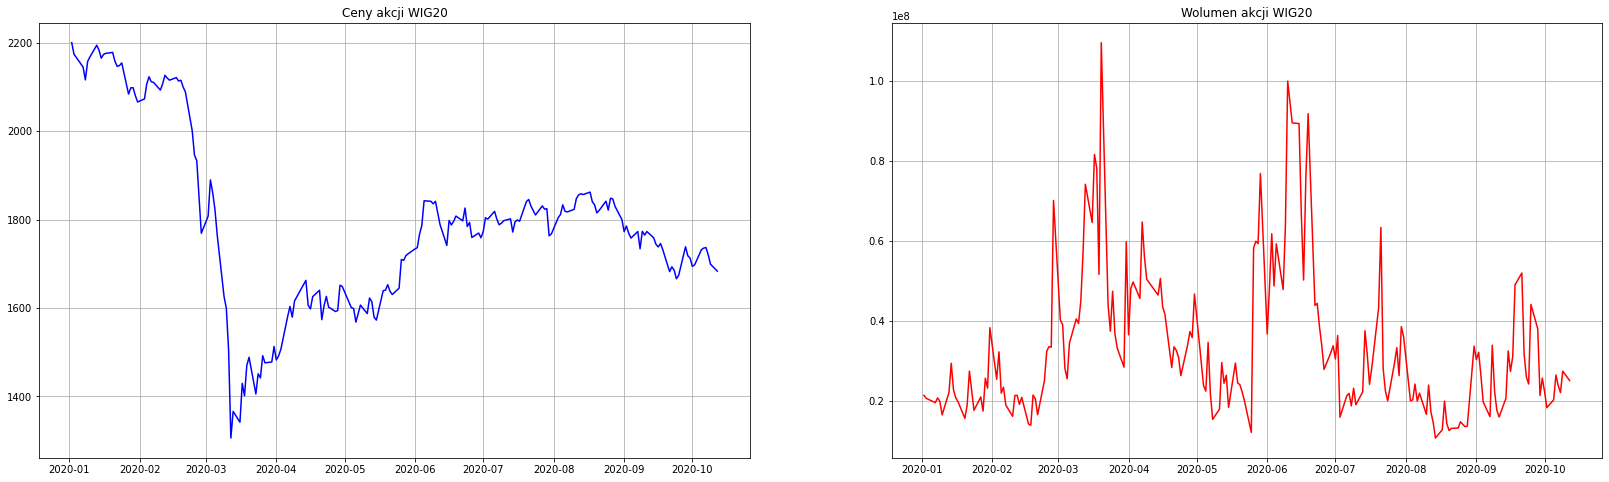

In [8]:
plt.figure( figsize = (28, 8 ))
#1
plt.subplot(121)
plt.plot(wig20['Close'], color = 'blue')
plt.title('Ceny akcji WIG20')
plt.grid()
#2
plt.subplot(122)
plt.plot(wig20['Volume'], color = 'red')
plt.title('Wolumen akcji WIG20')
plt.grid()

### 4. Stopa zwrotu akcji

In [9]:
wig20['pct_change'] = wig20['Close'].pct_change()

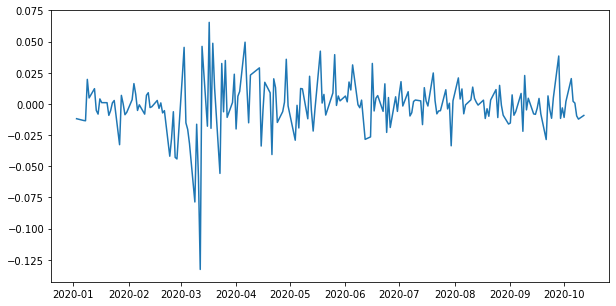

In [10]:
plt.figure(figsize=(10,5))
plt.plot(wig20['pct_change'])

In [11]:
wig20['log_change'] = np.log(wig20['Close'].pct_change()+1)

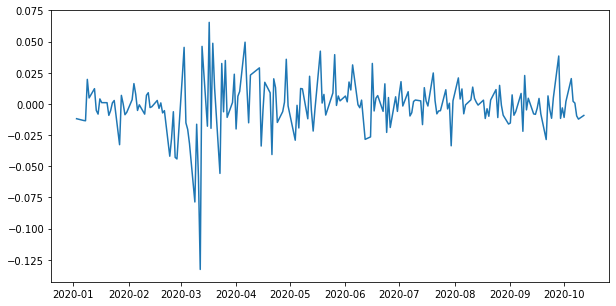

In [12]:
plt.figure(figsize=(10,5))
plt.plot(wig20['pct_change'])

### 5. Histogram stopy zwrotu

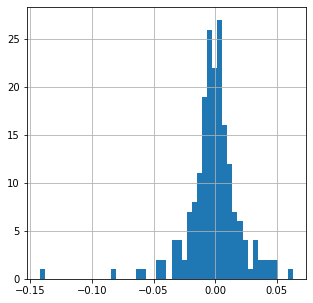

In [13]:
plt.figure(figsize=(5,5))
wig20['log_change'].hist(bins = 50)

In [14]:
wig20['log_change'].describe()

count    197.000000
mean      -0.001359
std        0.021655
min       -0.142456
25%       -0.009143
50%       -0.000739
75%        0.007680
max        0.063353
Name: log_change, dtype: float64

# CD Projekt



## Pobieranie danych






In [15]:
cdr = pdr.get_data_stooq('cdr.pl',start = dt.datetime(2020,1,1)).drop(columns = ['High','Low']).sort_index()

## Analiza danych

### 1. Podstawowe statystyki oraz wstępna eksploracja danych




In [16]:
cdr.describe()

,Open,Close,Volume
count,199.000000,199.000000,1.990000e+02
mean,356.883417,357.118593,4.044088e+05
std,56.092758,55.555334,2.740295e+05
min,228.000000,216.100000,1.082660e+05
25%,302.300000,305.400000,2.449645e+05
50%,373.400000,373.100000,3.284780e+05
75%,404.500000,402.800000,4.565810e+05
max,455.300000,460.800000,2.794383e+06


In [17]:
cdr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 199 entries, 2020-01-02 to 2020-10-13
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    199 non-null    float64
 1   Close   199 non-null    float64
 2   Volume  199 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 6.2 KB


In [18]:
cdr.tail()

,Open,Close,Volume
Date,,,
2020-10-07,375.3,377.1,529453
2020-10-08,381.2,388.9,363144
2020-10-09,389.9,378.2,367450
2020-10-12,378.0,371.0,430801
2020-10-13,371.0,383.0,283063


### 2. Zmiana interwału

In [19]:
cdr.resample('W').mean().tail() # średnia na koniec każdego tygodnia

,Open,Close,Volume
Date,,,
2020-09-20,412.56,406.34,483857.2
2020-09-27,400.56,401.16,423194.2
2020-10-04,415.18,411.84,596942.0
2020-10-11,389.88,383.54,488461.8
2020-10-18,374.50,377.00,356932.0


In [20]:
cdr.resample('M').last().tail() # ostatnia cena akcji z każdego miesiąca

,Open,Close,Volume
Date,,,
2020-06-30,400.0,394.9,293413
2020-07-31,399.6,402.0,237486
2020-08-31,446.0,438.5,335642
2020-09-30,425.0,418.4,428692
2020-10-31,371.0,383.0,283063


### 3. Graficzne przedstawienie danych

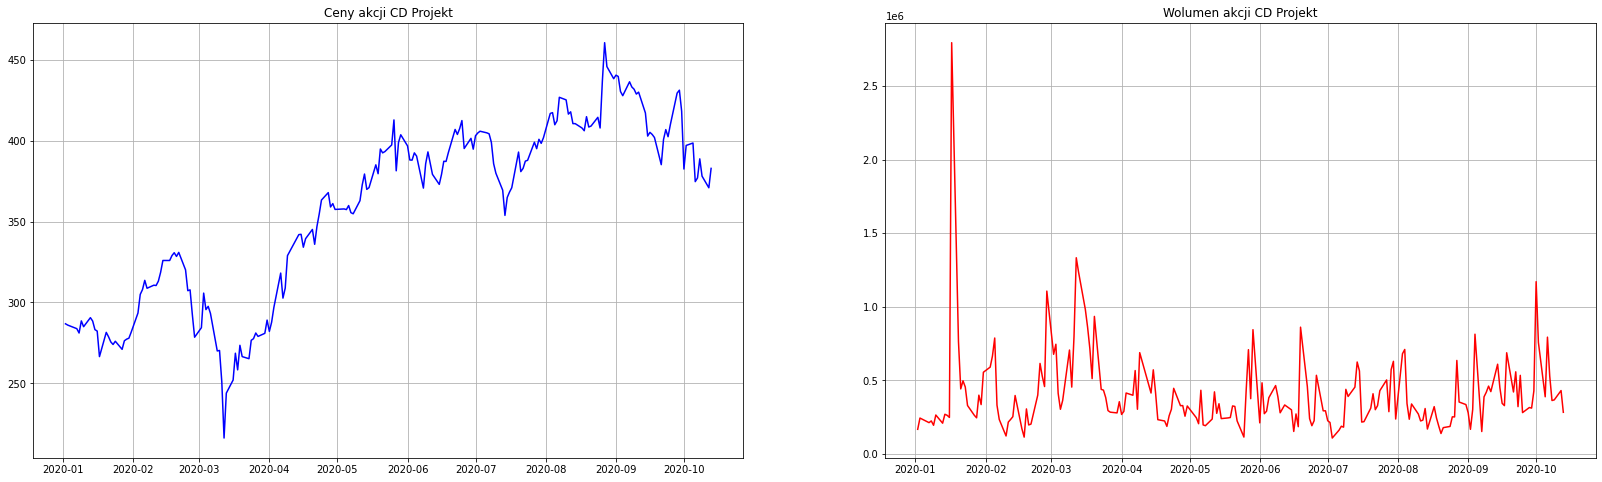

In [21]:
plt.figure( figsize = (28, 8 ))
#1
plt.subplot(121)
plt.plot(cdr['Close'], color = 'blue')
plt.title('Ceny akcji CD Projekt')
plt.grid()
#2
plt.subplot(122)
plt.plot(cdr['Volume'], color = 'red')
plt.title('Wolumen akcji CD Projekt')
plt.grid()

### 4. Stopa zwrotu akcji

In [22]:
cdr['pct_change'] = cdr['Close'].pct_change()

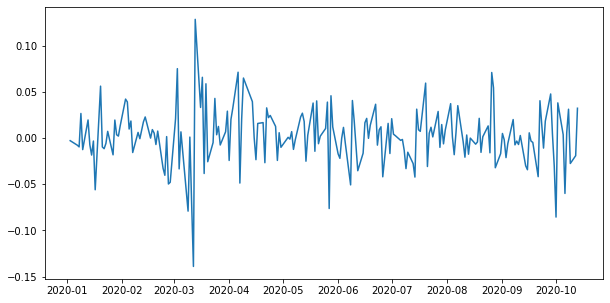

In [23]:
plt.figure(figsize=(10,5))
plt.plot(cdr['pct_change'])

In [24]:
cdr['log_change'] = np.log(cdr['Close'].pct_change()+1)

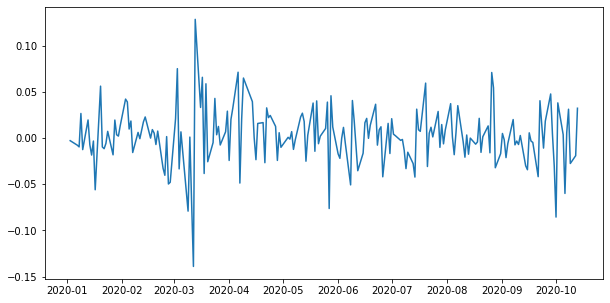

In [25]:
plt.figure(figsize=(10,5))
plt.plot(cdr['pct_change'])

### 5. Histogram stopy zwrotu

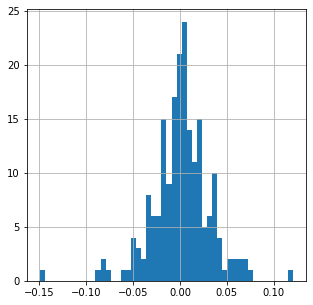

In [26]:
plt.figure(figsize=(5,5))
cdr['log_change'].hist(bins = 50)

In [27]:
cdr['log_change'].describe()

count    198.000000
mean       0.001461
std        0.031163
min       -0.149712
25%       -0.014767
50%        0.002099
75%        0.018306
max        0.121017
Name: log_change, dtype: float64

# KGHM



## Pobieranie danych






In [28]:
kghm = pdr.get_data_stooq('kgh.pl',start = dt.datetime(2020,1,1)).drop(columns = ['High','Low']).sort_index()

## Analiza danych

### 1. Podstawowe statystyki oraz wstępna eksploracja danych




In [29]:
kghm.describe()

,Open,Close,Volume
count,199.000000,199.000000,1.990000e+02
mean,96.910050,97.034171,7.421198e+05
std,24.717616,24.991452,3.974939e+05
min,52.000000,49.400000,1.138730e+05
25%,76.600000,76.780000,4.756360e+05
50%,94.020000,93.900000,6.365160e+05
75%,118.250000,118.650000,9.118125e+05
max,138.600000,139.350000,2.216140e+06


In [30]:
kghm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 199 entries, 2020-01-02 to 2020-10-13
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    199 non-null    float64
 1   Close   199 non-null    float64
 2   Volume  199 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 6.2 KB


In [31]:
kghm.tail()

,Open,Close,Volume
Date,,,
2020-10-07,116.85,120.00,640460
2020-10-08,120.90,116.15,590399
2020-10-09,115.50,119.95,440087
2020-10-12,120.70,121.90,776814
2020-10-13,122.00,119.00,225824


### 2. Zmiana interwału

In [32]:
kghm.resample('W').mean().tail() # średnia na koniec każdego tygodnia

,Open,Close,Volume
Date,,,
2020-09-20,135.22,134.88,685294.8
2020-09-27,123.69,122.00,534514.6
2020-10-04,118.34,117.57,475353.0
2020-10-11,117.33,118.32,559873.0
2020-10-18,121.35,120.45,501319.0


In [33]:
kghm.resample('M').last().tail() # ostatnia cena akcji z każdego miesiąca

,Open,Close,Volume
Date,,,
2020-06-30,90.50,90.90,861061
2020-07-31,125.10,126.05,999532
2020-08-31,136.60,136.85,729786
2020-09-30,117.65,118.00,572246
2020-10-31,122.00,119.00,225824


### 3. Graficzne przedstawienie danych

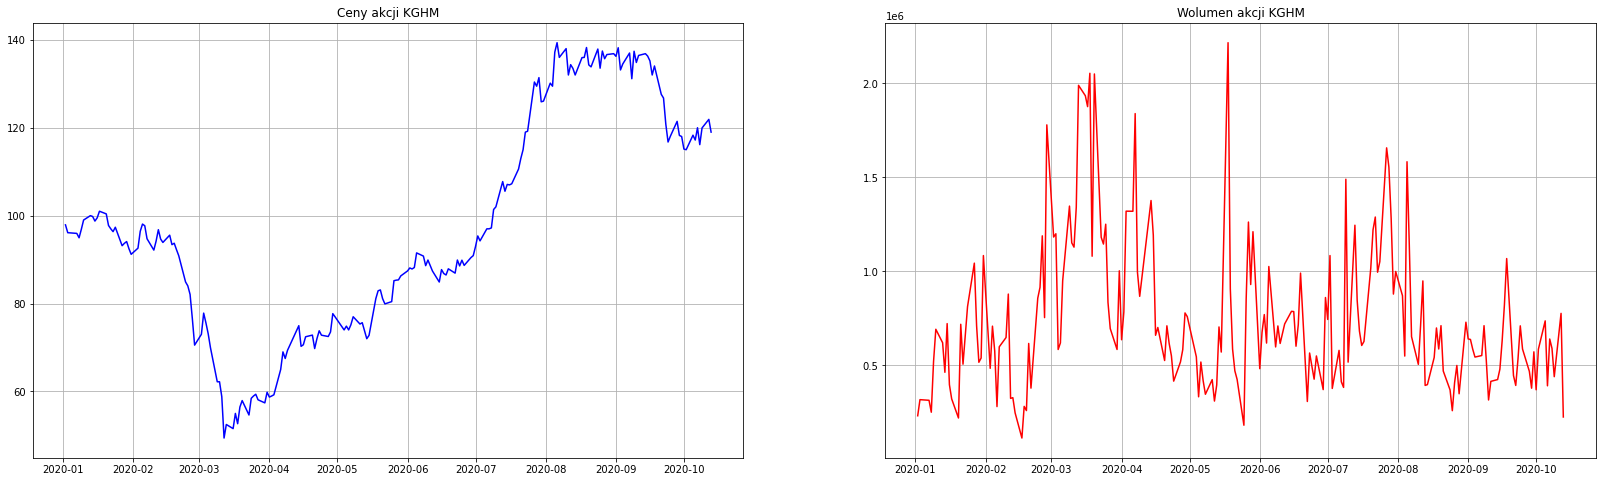

In [34]:
plt.figure( figsize = (28, 8 ))
#1
plt.subplot(121)
plt.plot(kghm['Close'], color = 'blue')
plt.title('Ceny akcji KGHM')
plt.grid()
#2
plt.subplot(122)
plt.plot(kghm['Volume'], color = 'red')
plt.title('Wolumen akcji KGHM')
plt.grid()

### 4. Stopa zwrotu akcji

In [35]:
kghm['pct_change'] = kghm['Close'].pct_change()

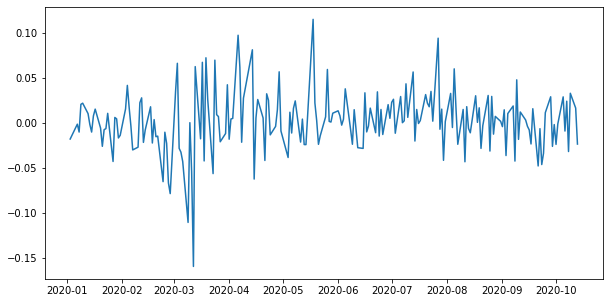

In [36]:
plt.figure(figsize=(10,5))
plt.plot(kghm['pct_change'])

In [37]:
kghm['log_change'] = np.log(kghm['Close'].pct_change()+1)

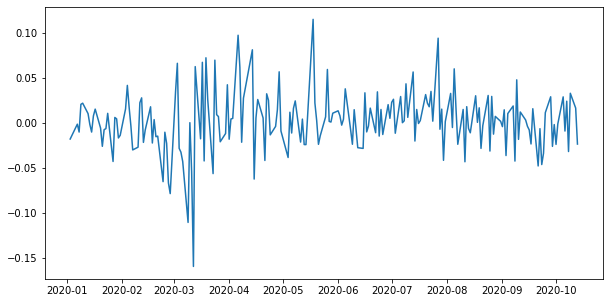

In [38]:
plt.figure(figsize=(10,5))
plt.plot(kghm['pct_change'])

### 5. Histogram stopy zwrotu

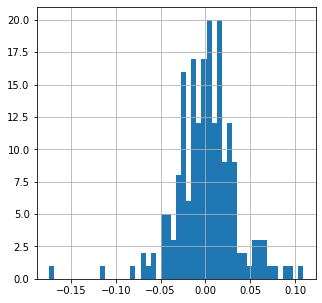

In [39]:
plt.figure(figsize=(5,5))
kghm['log_change'].hist(bins = 50)

In [40]:
kghm['log_change'].describe()

count    198.000000
mean       0.000986
std        0.033837
min       -0.174191
25%       -0.017843
50%        0.001571
75%        0.017621
max        0.108763
Name: log_change, dtype: float64

# Model

In [41]:
def make_portfolio(stocks,start_date):
  #Pobieranie danych
  def get_data(stock):
    return pdr.get_data_stooq(stock, start = start_date)
  
  stocks_data = map(get_data,stocks)

  full_dataframe = pd.concat(stocks_data, keys= stocks, names= ['Stock','Date'])

  return  full_dataframe[['Close']].reset_index().pivot(index='Date',columns = 'Stock', values = 'Close')

In [42]:
make_portfolio(['wig20.pl','pkn.pl'], dt.date(2020,3,1))

Stock,pkn.pl,wig20.pl
Date,,
2020-03-02,59.574,1807.70
2020-03-03,61.246,1889.67
2020-03-04,58.079,1860.95
2020-03-05,55.934,1822.85
2020-03-06,53.455,1764.81
...,...,...
2020-10-07,46.760,1736.61
2020-10-08,46.660,1719.91
2020-10-09,45.830,1698.91
